<a href="https://colab.research.google.com/github/tolerant-code/Python-Data-Visualizations/blob/main/Knowledge_based_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align = "center">Department of Artificial Intelligence and Data Science</h1>
<h2 align = "center">Business Intelligence and Data Analytics Project on Movie Recommendation</h2>
<h3 align="center">Name: Chalachew Mulu    |  Email: tolerantfull@gmail.com</h3>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.sparse import csr_matrix
#from sklearn.neighbors import NearestNeighbors
#from sklearn.model_selection import train_test_split

## Loading MovieLens rating dataset of size 100k

In [2]:
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'

In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

In [7]:
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [ ]:
## same item id is same as movie id, item id column is renamed as movie id
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head()

In [9]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])

(100000, 1682, 1)

In [ ]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

In [11]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

## Merging required datasets

In [ ]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

In [ ]:
merged_dataset.describe()

## Data Visualization & Recommendations through Data Analysis

In [15]:
import plotly.graph_objs as go
import plotly.io as pio

# Get the rating frequency data
data = merged_dataset['rating'].value_counts(sort=False)

# Create the bar chart
fig = go.Figure(
    data=[go.Bar(x=data.index, y=data)],
    layout=go.Layout(
        title=dict(
            text='Frequency of Ratings',
            font=dict(size=24),
            x=0.5
        ),
        xaxis=dict(
            title='Rating',
            title_font=dict(size=18),
            tickfont=dict(size=14),
            showgrid=False,
            tickvals=[1,2,3,4,5],
            ticktext=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
        ),
        yaxis=dict(
            title='Number of Reviews',
            title_font=dict(size=18),
            tickfont=dict(size=14),
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=0.5
        ),
        margin=dict(l=50, r=50, t=100, b=50),
        plot_bgcolor='white'
    )
)

# Add labels to the bars
fig.update_traces(text=data.values, textposition='outside', textfont=dict(size=14))

# Adjust uniform text size
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# Show the plot
pio.show(fig)

We can observe that most of the users have rewarded movies they watched with a 4 star rating and followed by 3 star and 5 star.

In [16]:
avg_highly_rated_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()

In [ ]:
avg_highly_rated_movies.head(20)

In [18]:
print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))


Number of movies with 5 star rating on average:  10
Number of movies with above 4 star and below 5 star rating on average:  163
Number of movies with above 3 star and below 4 star rating on average:  871
Number of movies with above 2 star and below 3 star rating on average:  492
Number of movies with above 1 star and below 2 star rating on average:  128
Number of movies with below 1 star rating on average:  0


Split of movies count based on their overall average rating


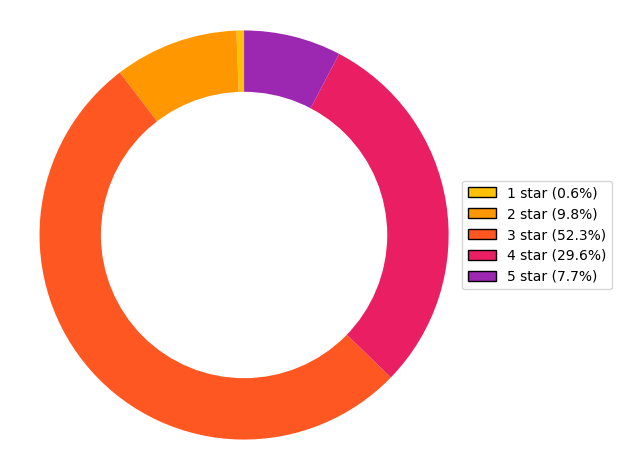

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

print('Split of movies count based on their overall average rating')

colors = ['#FFC107', '#FF9800', '#FF5722', '#E91E63', '#9C27B0']
sizes = [10, 163, 871, 492, 128]

total = sum(sizes)
percentages = [size/total*100 for size in sizes]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, autopct='', startangle=90)

# Add white circle to create donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')

# Create legend with number of stars and percentages
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label='{} star ({:.1f}%)'.format(i+1, percentages[i])) for i in range(len(colors))]
ax1.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.3, 0.5))

plt.tight_layout()
plt.show()

In [20]:
avg_highly_rated_movies.reset_index(level=0, inplace=True)

In [ ]:
avg_highly_rated_movies.columns = ['movie title', 'avg rating']

avg_highly_rated_movies.head(10)

In [ ]:
merged_dataset.groupby(['movie title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)

In [ ]:
merged_dataset['movie id'].value_counts(sort=False).plot(kind='bar' ,figsize=(20,6), use_index = True, rot=0)
plt.title('Bar plot of frequency of a movie being watched')
plt.xlabel('Movies')
plt.ylabel('Number of times a user watched that movie')


In [24]:
popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)


In [25]:
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']

In [26]:
print("Number of popular movies with more than 500 viewers: ",len(popular_movies[popular_movies['Number of Users watched'] >= 500]))
print("Number of popular movies with more than 400 and less than 500 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)]))
print("Number of popular movies with more than 300 and less than 400 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]))
print("Number of popular movies with more than 200 and less than 300 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]))
print("Number of popular movies with more than 100 and less than 200 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]))
print("Number of popular movies with less than 100 viewers: ", len(popular_movies[(popular_movies['Number of Users watched'] < 100)]))


Number of popular movies with more than 500 viewers:  4
Number of popular movies with more than 400 and less than 500 viewers:  8
Number of popular movies with more than 300 and less than 400 viewers:  22
Number of popular movies with more than 200 and less than 300 viewers:  84
Number of popular movies with more than 100 and less than 200 viewers:  220
Number of popular movies with less than 100 viewers:  1326


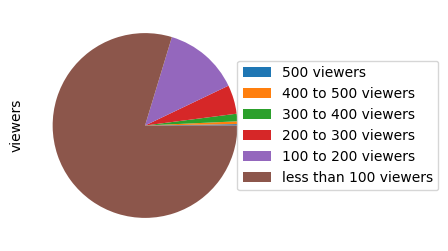

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'viewers': [4, 8, 22, 84, 220, 1326]},
                  index=['500 viewers', '400 to 500 viewers', '300 to 400 viewers', '200 to 300 viewers', '100 to 200 viewers', 'less than 100 viewers'])

plot = df.plot.pie(y='viewers', figsize=(3, 3), labels=None)
plot.set_title("")
plot.legend(loc='center right', labels=df.index, bbox_to_anchor=(1.8, 0.5))
plt.show()

In [ ]:
popular_movies[popular_movies['Number of Users watched'] >= 400]

In [ ]:
highly_rated_popular_movies = pd.merge(avg_highly_rated_movies, popular_movies, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)

In [ ]:
highly_rated_popular_movies[highly_rated_popular_movies['Number of Users watched']>400]

In [ ]:
highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>300) & (highly_rated_popular_movies['avg rating']>=4.0)]

## Recommendations based on Movie Genre to a New User.

In [ ]:
movie_genre_list = column_names2[-19:]
movie_genre_list

In [33]:
import plotly.graph_objs as go
import plotly.io as pio

# Define a color scale for the bars
color_scale = ['#F6D55C', '#FFA600', '#FF5C5C', '#A05195', '#3F3F3F']

# Create a dataframe with the counts for each genre
count = []
for i in movie_genre_list:
    genre_based_movies = items_dataset[['movie id','movie title',i]]
    genre_based_movies = genre_based_movies[genre_based_movies[i] == 1]
    count.append(len(genre_based_movies))
df = pd.DataFrame({'Movie genre':movie_genre_list, 'Number of movies':count})

# Create a bar chart
fig = go.Figure(
    data=[go.Bar(x=df['Movie genre'], y=df['Number of movies'], marker=dict(color=df['Number of movies'], colorscale=color_scale), hovertemplate='<b>%{x}</b><br>Number of Movies: %{y}')],
    layout=go.Layout(
        title=go.layout.Title(text='Number of Movies by Genre', font=dict(size=24)),
        xaxis=go.layout.XAxis(title='Movie Genre', tickangle=60, automargin=True, tickfont=dict(size=14)),
        yaxis=go.layout.YAxis(title='Number of Movies', titlefont=dict(size=18), tickfont=dict(size=14)),
        margin=go.layout.Margin(l=50, r=50, t=80, b=50),
        plot_bgcolor='white'
    )
)

# Update the font style of the plot title and hover text
fig.update_layout(hoverlabel=dict(font=dict(size=16)), uniformtext_minsize=12, uniformtext_mode='hide')

# Show the plot
pio.show(fig)

We can see that most of the movies belong to movie genre : **Drama** followed by **Comedy** then **Action, Romance and Thriller**

In [34]:
def star_based_visualization(dataframe):
  dataframe['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
  plt.title('Bar plot of rating frequency')
  plt.xlabel('Rating')
  plt.ylabel('Number of times a rating was given')
  # label = list(dataframe['rating'].value_counts(sort=False))
  plt.show()
  print("Total number of users watched this Genre: ",len(dataframe))
  print("  ")


In [35]:
def recommendations_genre(genre):
  x = genre
  print("****************************     ******************************     ******************************")
  print("****************************     ****** GENRE: ", x," ******     ******************************")
  print("    ")
  genre_based_movies = items_dataset[['movie id','movie title',x]]
  genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
  merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
  # merged_genre_movies.head()

  star_based_visualization(merged_genre_movies)
  high_rated_movies = merged_genre_movies.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
  high_rated_movies = high_rated_movies.to_frame()
  print("These are the top movies that can be naviely suggested to the new users for the requested movie genre:", x, ". Recommendations based on top average ratings.")
  print(high_rated_movies.head(10))
  print("****************************     ******************************     ******************************")
  popular_movies_ingenre = merged_genre_movies.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
  popular_movies_ingenre = popular_movies_ingenre.to_frame()
  popular_movies_ingenre.reset_index(level=0, inplace=True)
  popular_movies_ingenre.columns = ['movie title', 'Number of Users watched']
  print("These are the most popular movies which can be recommended to a new user in",x,"genre. Recommendations based on Popularity")
  print(popular_movies_ingenre.sort_values('Number of Users watched', ascending=False).head(10))
  print("****************************     ******************************     ******************************")
  highly_rated_popular_movies = pd.merge(high_rated_movies, popular_movies_ingenre, how = 'inner', on='movie title')
  # highly_rated_popular_movies.head(10)
  viewer_limit = 300
  ratings_limit = 4.0
  count = 0
  check = 0
  while viewer_limit > 0 and ratings_limit > 0:
    s = highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>viewer_limit) & (highly_rated_popular_movies['rating']>=ratings_limit)]
    if len(s) < 11:
      if check == 0:
        viewer_limit -= 50
        check = 1
      else:
        ratings_limit -= 0.5
        check = 0
    else:
      break
  print("These movies are the best to suggest to a new user within their requested genre as they are popular and well rated by the users who already watched them.")
  print("These have rating more than ",ratings_limit," with atleast ",viewer_limit ," viewers.")

  print("**Recommendations based popularity and rating. These are top rated popular movies**")
  print(s)
  print("****************************     ******************************     ******************************")
  print("                             ")
  print("                             ")


****************************     ******************************     ******************************
****************************     ****** GENRE:  Action  ******     ******************************
    


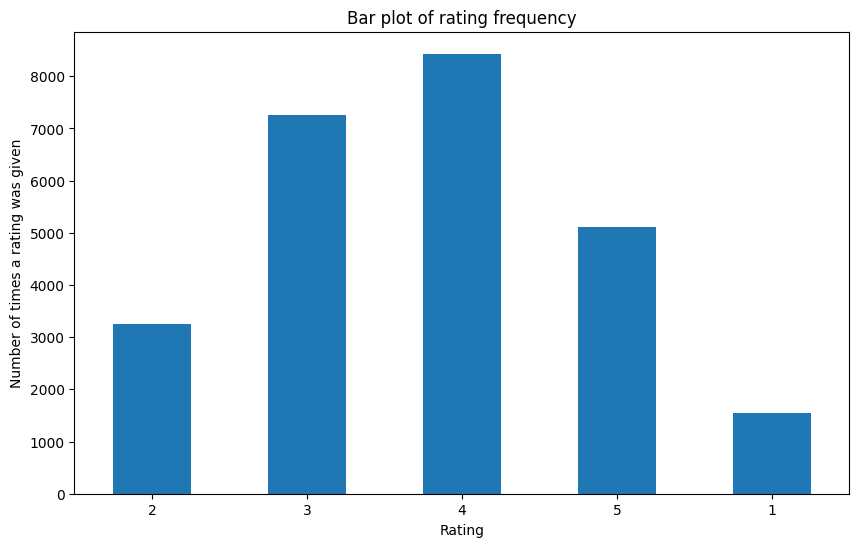

Total number of users watched this Genre:  25589
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Action . Recommendations based on top average ratings.
                                   rating
movie title                              
Star Wars (1977)                 4.358491
Godfather, The (1972)            4.283293
Raiders of the Lost Ark (1981)   4.252381
Titanic (1997)                   4.245714
Empire Strikes Back, The (1980)  4.204360
Boot, Das (1981)                 4.203980
Godfather: Part II, The (1974)   4.186603
African Queen, The (1951)        4.184211
Princess Bride, The (1987)       4.172840
Braveheart (1995)                4.151515
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Action genre. Recommendations based on Popularity
                       movie title  Number of Users watched
0

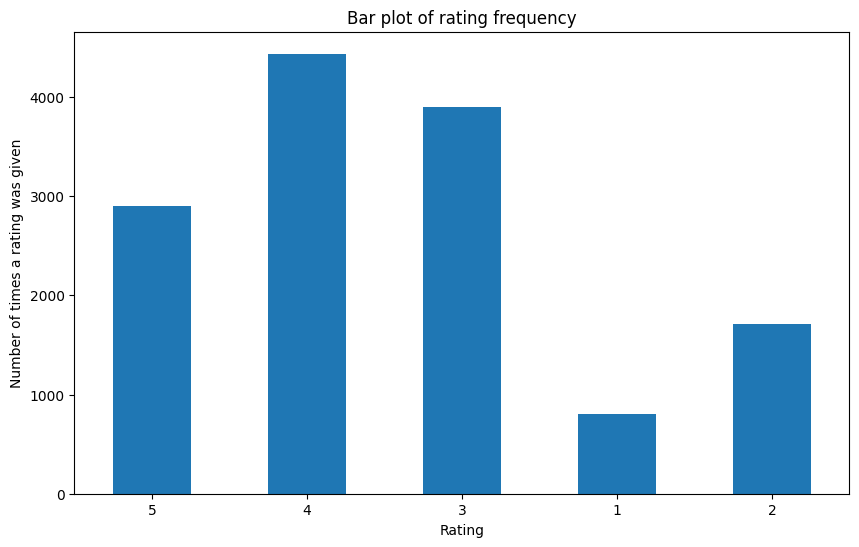

Total number of users watched this Genre:  13753
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Adventure . Recommendations based on top average ratings.
                                            rating
movie title                                       
Star Kid (1997)                           5.000000
Star Wars (1977)                          4.358491
Raiders of the Lost Ark (1981)            4.252381
Lawrence of Arabia (1962)                 4.231214
Empire Strikes Back, The (1980)           4.204360
African Queen, The (1951)                 4.184211
Princess Bride, The (1987)                4.172840
Great Escape, The (1963)                  4.104839
Treasure of the Sierra Madre, The (1948)  4.100000
Wizard of Oz, The (1939)                  4.077236
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in 

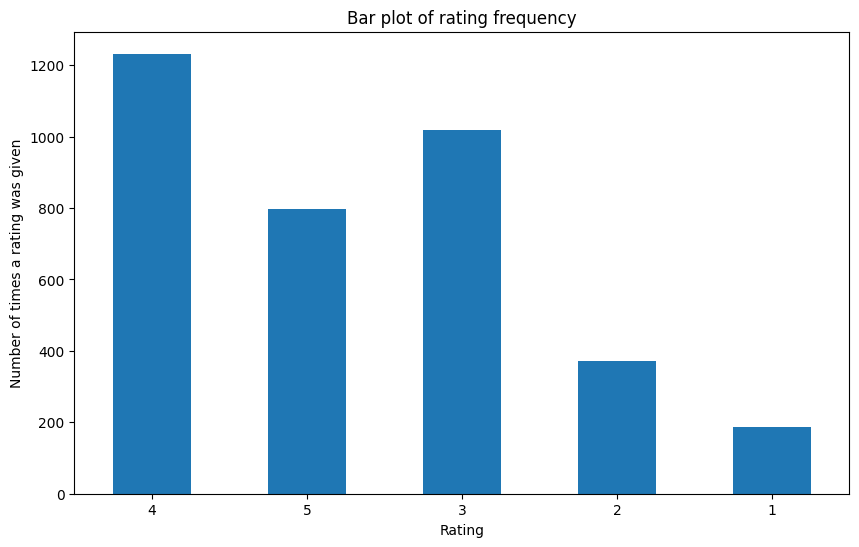

Total number of users watched this Genre:  3605
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Animation . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Close Shave, A (1995)                               4.491071
Wrong Trousers, The (1993)                          4.466102
Wallace & Gromit: The Best of Aardman Animation...  4.447761
Faust (1994)                                        4.200000
Grand Day Out, A (1992)                             4.106061
Toy Story (1995)                                    3.878319
Aladdin (1992)                                      3.812785
Winnie the Pooh and the Blustery Day (1968)         3.800000
Beauty and the Beast (1991)                         3.792079
Lion King, The (1994)                               3.781818
****************************     ***********************

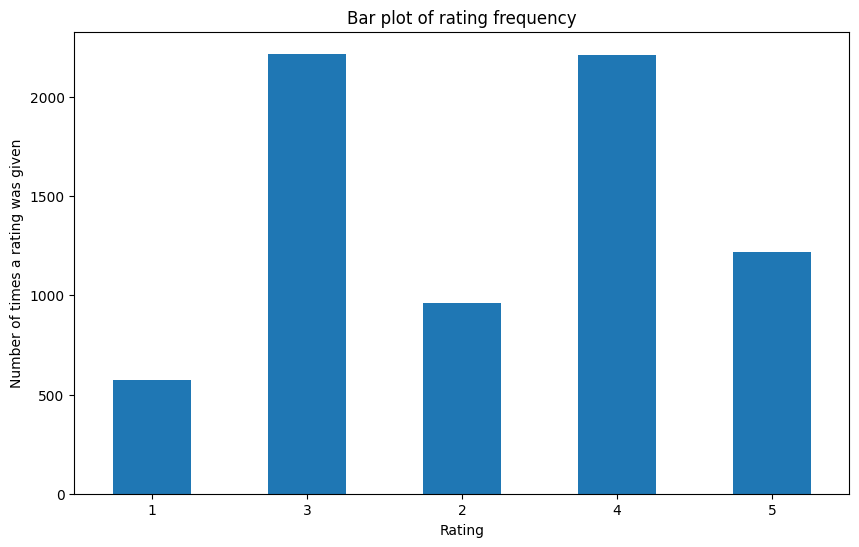

Total number of users watched this Genre:  7182
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Children . Recommendations based on top average ratings.
                                               rating
movie title                                          
Star Kid (1997)                              5.000000
Wizard of Oz, The (1939)                     4.077236
Babe (1995)                                  3.995434
Toy Story (1995)                             3.878319
E.T. the Extra-Terrestrial (1982)            3.833333
Aladdin (1992)                               3.812785
Winnie the Pooh and the Blustery Day (1968)  3.800000
Beauty and the Beast (1991)                  3.792079
Lion King, The (1994)                        3.781818
Fantasia (1940)                              3.770115
****************************     ******************************     ******************************
These are the most popular movies which ca

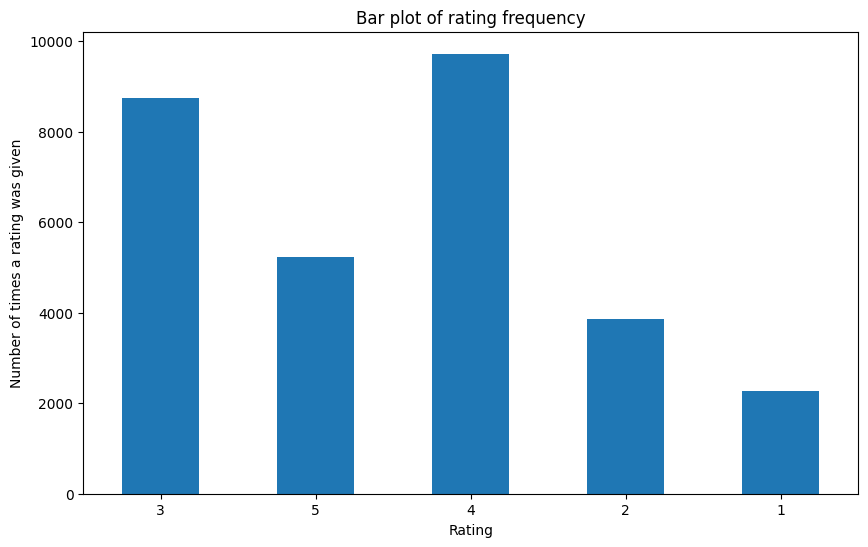

Total number of users watched this Genre:  29832
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Comedy . Recommendations based on top average ratings.
                              rating
movie title                         
Santa with Muscles (1996)   5.000000
Close Shave, A (1995)       4.491071
Wrong Trousers, The (1993)  4.466102
North by Northwest (1959)   4.284916
Shall We Dance? (1996)      4.260870
As Good As It Gets (1997)   4.196429
Cinema Paradiso (1988)      4.173554
Princess Bride, The (1987)  4.172840
Waiting for Guffman (1996)  4.127660
A Chef in Love (1996)       4.125000
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Comedy genre. Recommendations based on Popularity
                                    movie title  Number of Users watched
0                              Liar Liar (1997) 

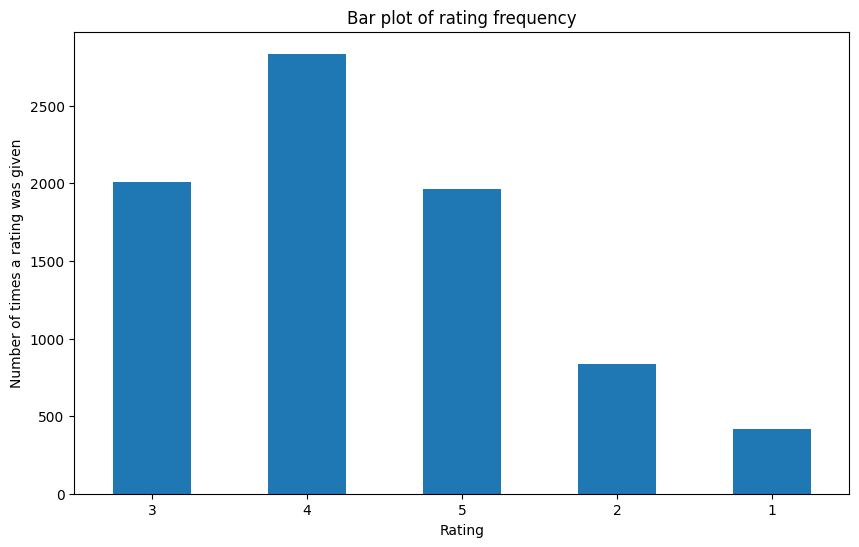

Total number of users watched this Genre:  8055
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Crime . Recommendations based on top average ratings.
                                   rating
movie title                              
They Made Me a Criminal (1939)   5.000000
Usual Suspects, The (1995)       4.385768
Letter From Death Row, A (1998)  4.333333
Godfather, The (1972)            4.283293
Crossfire (1947)                 4.250000
Godfather: Part II, The (1974)   4.186603
L.A. Confidential (1997)         4.161616
Fargo (1996)                     4.155512
Laura (1944)                     4.100000
Once Were Warriors (1994)        4.064516
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Crime genre. Recommendations based on Popularity
                      movie title  Number of Users watched
0    

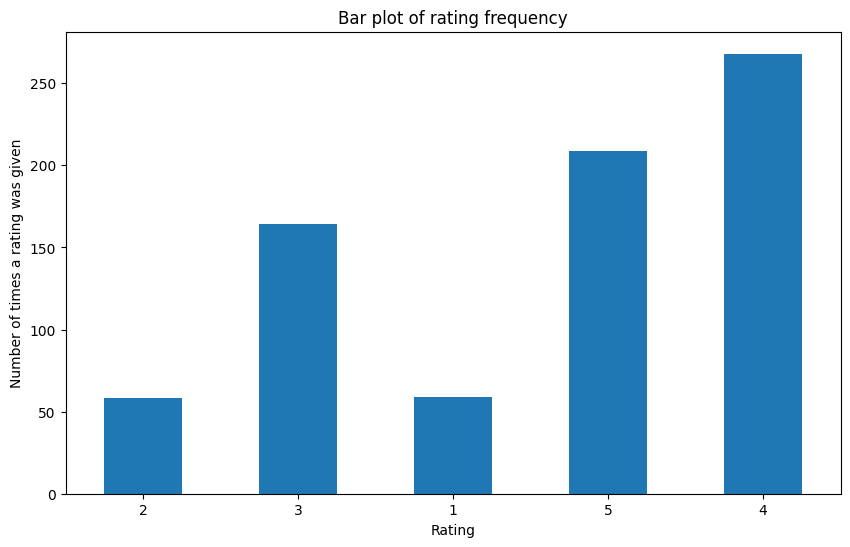

Total number of users watched this Genre:  758
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Documentary . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Marlene Dietrich: Shadow and Light (1996)           5.000000
Great Day in Harlem, A (1994)                       5.000000
Everest (1998)                                      4.500000
Maya Lin: A Strong Clear Vision (1994)              4.500000
Hoop Dreams (1994)                                  4.094017
Paradise Lost: The Child Murders at Robin Hood ...  4.050000
When We Were Kings (1996)                           4.045455
Nico Icon (1995)                                    4.000000
Jupiter's Wife (1994)                               4.000000
Perfect Candidate, A (1996)                         4.000000
****************************     **********************

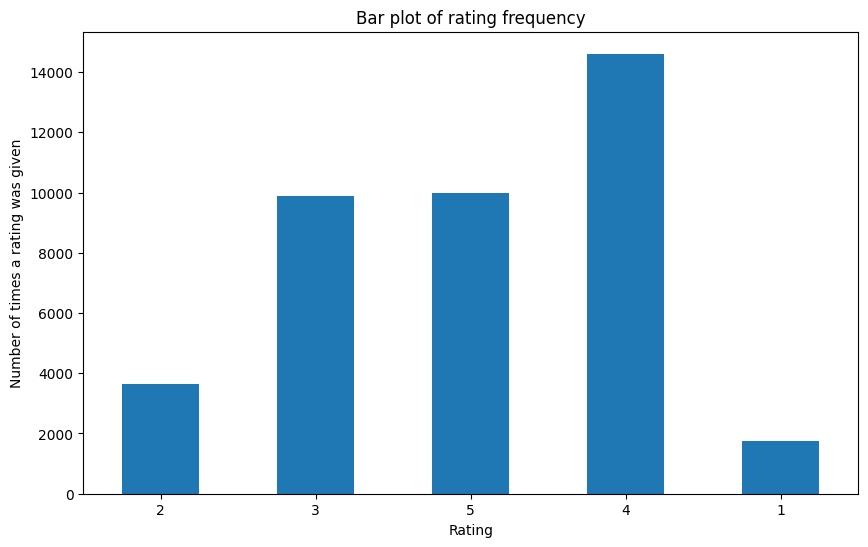

Total number of users watched this Genre:  39895
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Drama . Recommendations based on top average ratings.
                                                     rating
movie title                                                
Aiqing wansui (1994)                               5.000000
Saint of Fort Washington, The (1993)               5.000000
Prefontaine (1997)                                 5.000000
Entertaining Angels: The Dorothy Day Story (1996)  5.000000
They Made Me a Criminal (1939)                     5.000000
Someone Else's America (1995)                      5.000000
Pather Panchali (1955)                             4.625000
Anna (1996)                                        4.500000
Some Mother's Son (1996)                           4.500000
Schindler's List (1993)                            4.466443
****************************     ******************************     ***

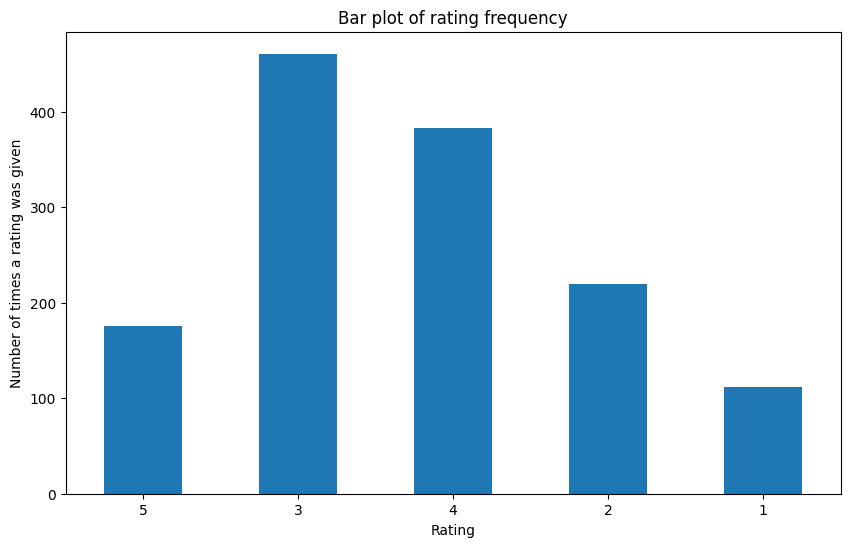

Total number of users watched this Genre:  1352
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Fantasy . Recommendations based on top average ratings.
                                       rating
movie title                                  
Star Kid (1997)                      5.000000
E.T. the Extra-Terrestrial (1982)    3.833333
Heavenly Creatures (1994)            3.671429
20,000 Leagues Under the Sea (1954)  3.500000
Jumanji (1995)                       3.312500
Mask, The (1994)                     3.193798
Dragonheart (1996)                   3.082278
Warriors of Virtue (1997)            3.000000
FairyTale: A True Story (1997)       2.966667
Escape to Witch Mountain (1975)      2.966667
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Fantasy genre. Recommendations based on Popularity
            

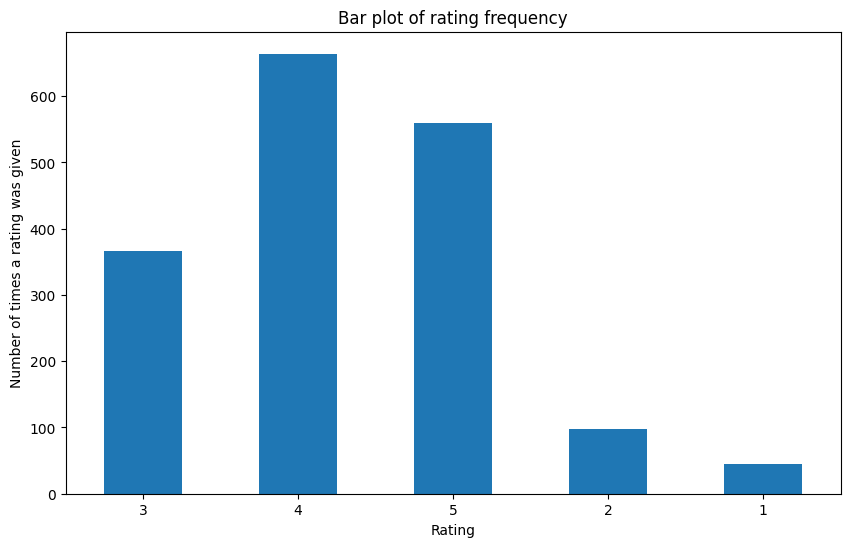

Total number of users watched this Genre:  1733
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Film-Noir . Recommendations based on top average ratings.
                                    rating
movie title                               
Manchurian Candidate, The (1962)  4.259542
Crossfire (1947)                  4.250000
Maltese Falcon, The (1941)        4.210145
Sunset Blvd. (1950)               4.200000
L.A. Confidential (1997)          4.161616
Blade Runner (1982)               4.138182
Chinatown (1974)                  4.136054
Notorious (1946)                  4.115385
Laura (1944)                      4.100000
Big Sleep, The (1946)             4.027397
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Film-Noir genre. Recommendations based on Popularity
                        movie title  Number 

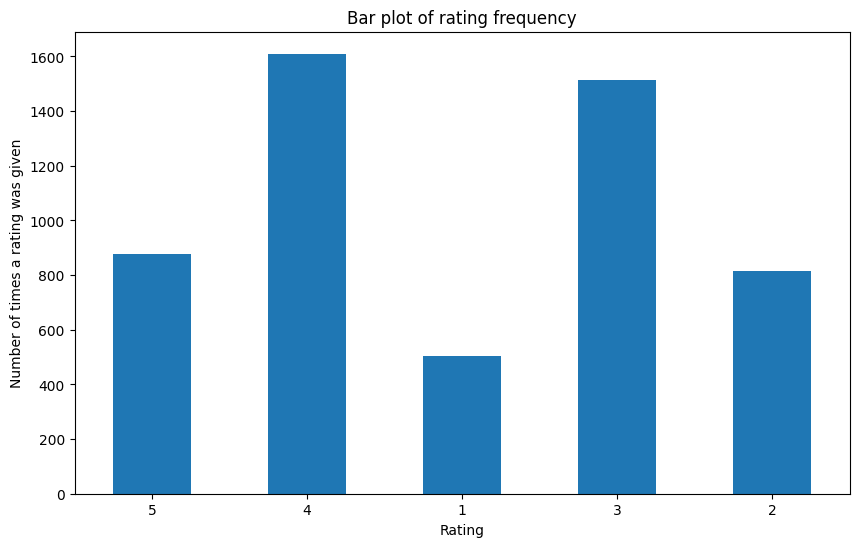

Total number of users watched this Genre:  5317
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Horror . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Psycho (1960)                                       4.100418
Alien (1979)                                        4.034364
Young Frankenstein (1974)                           3.945000
Braindead (1992)                                    3.857143
Shining, The (1980)                                 3.825243
Birds, The (1963)                                   3.808642
Jaws (1975)                                         3.775000
Night Flier (1997)                                  3.714286
Bride of Frankenstein (1935)                        3.608696
Nosferatu (Nosferatu, eine Symphonie des Grauen...  3.555556
****************************     **************************

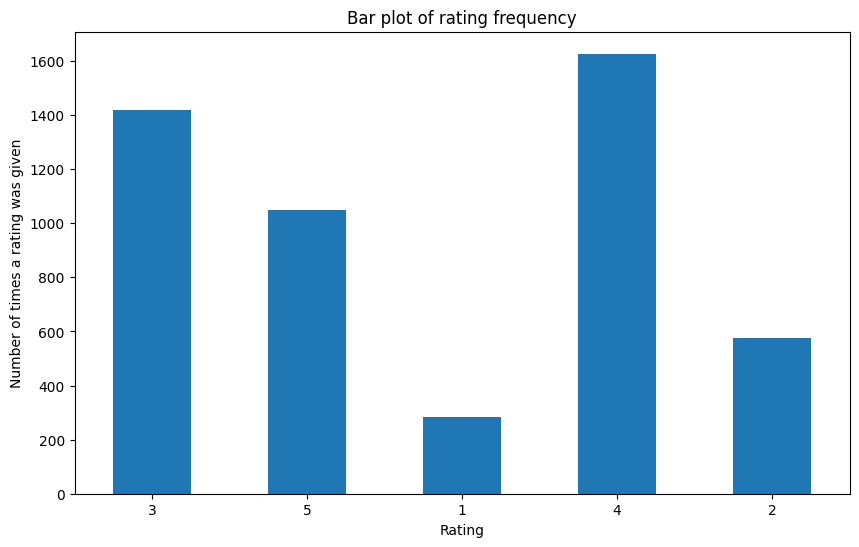

Total number of users watched this Genre:  4954
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Musical . Recommendations based on top average ratings.
                                rating
movie title                           
Wizard of Oz, The (1939)      4.077236
Top Hat (1935)                4.047619
Damsel in Distress, A (1937)  4.000000
Singin' in the Rain (1952)    3.992701
This Is Spinal Tap (1984)     3.905759
Gay Divorcee, The (1934)      3.866667
Blues Brothers, The (1980)    3.836653
My Fair Lady (1964)           3.816000
Aladdin (1992)                3.812785
Beauty and the Beast (1991)   3.792079
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Musical genre. Recommendations based on Popularity
                   movie title  Number of Users watched
0                 Evita (1996)          

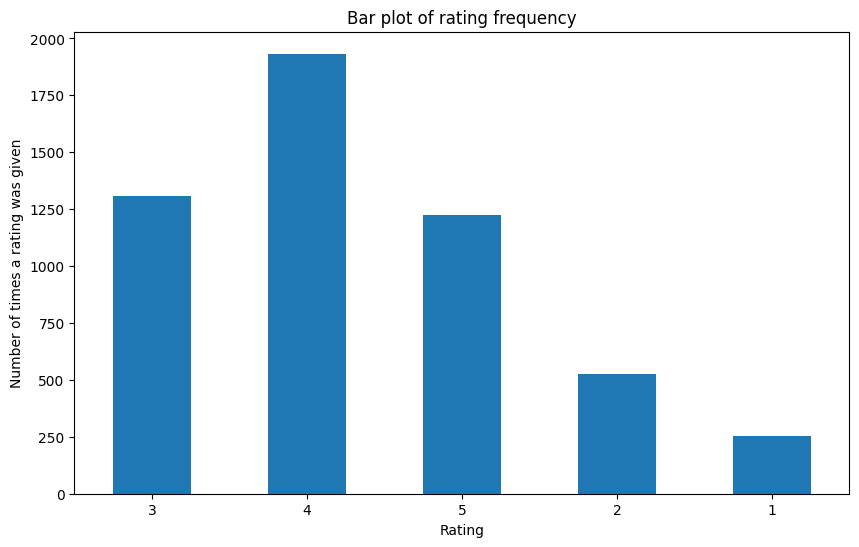

Total number of users watched this Genre:  5245
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Mystery . Recommendations based on top average ratings.
                               rating
movie title                          
Rear Window (1954)           4.387560
Third Man, The (1949)        4.333333
Vertigo (1958)               4.251397
Maltese Falcon, The (1941)   4.210145
Amadeus (1984)               4.163043
L.A. Confidential (1997)     4.161616
Thin Man, The (1934)         4.150000
Chinatown (1974)             4.136054
Laura (1944)                 4.100000
Arsenic and Old Lace (1944)  4.078261
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Mystery genre. Recommendations based on Popularity
                    movie title  Number of Users watched
0    Mission: Impossible (1996)                    

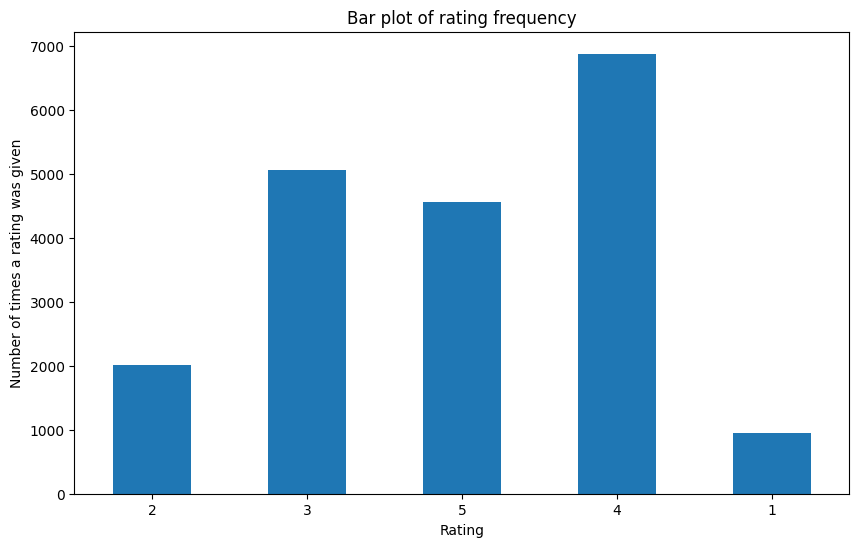

Total number of users watched this Genre:  19461
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Romance . Recommendations based on top average ratings.
                                   rating
movie title                              
Casablanca (1942)                4.456790
Star Wars (1977)                 4.358491
Titanic (1997)                   4.245714
Empire Strikes Back, The (1980)  4.204360
Affair to Remember, An (1957)    4.192308
African Queen, The (1951)        4.184211
Cinema Paradiso (1988)           4.173554
Princess Bride, The (1987)       4.172840
Notorious (1946)                 4.115385
Philadelphia Story, The (1940)   4.115385
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Romance genre. Recommendations based on Popularity
                       movie title  Number of Users watched

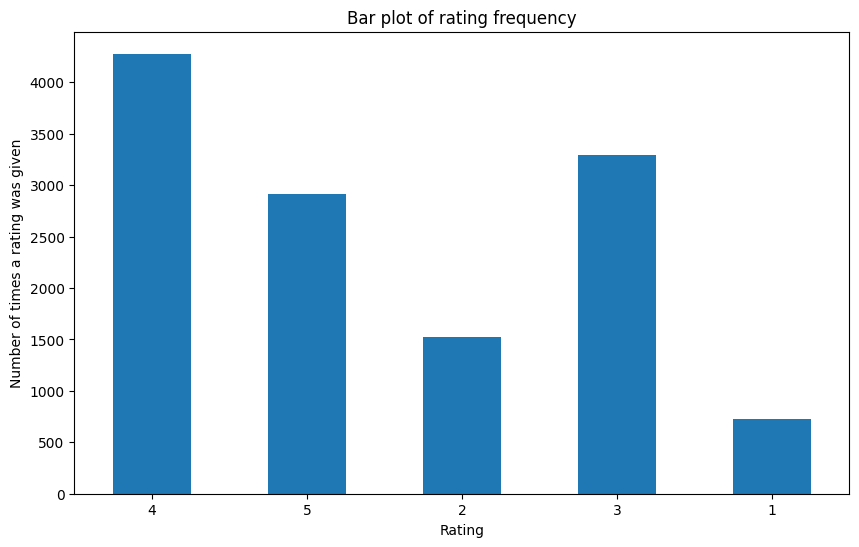

Total number of users watched this Genre:  12730
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Sci-Fi . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Star Kid (1997)                                     5.000000
Star Wars (1977)                                    4.358491
Dr. Strangelove or: How I Learned to Stop Worry...  4.252577
Empire Strikes Back, The (1980)                     4.204360
Blade Runner (1982)                                 4.138182
Alien (1979)                                        4.034364
Return of the Jedi (1983)                           4.007890
Terminator 2: Judgment Day (1991)                   4.006780
2001: A Space Odyssey (1968)                        3.969112
Aliens (1986)                                       3.947183
****************************     *************************

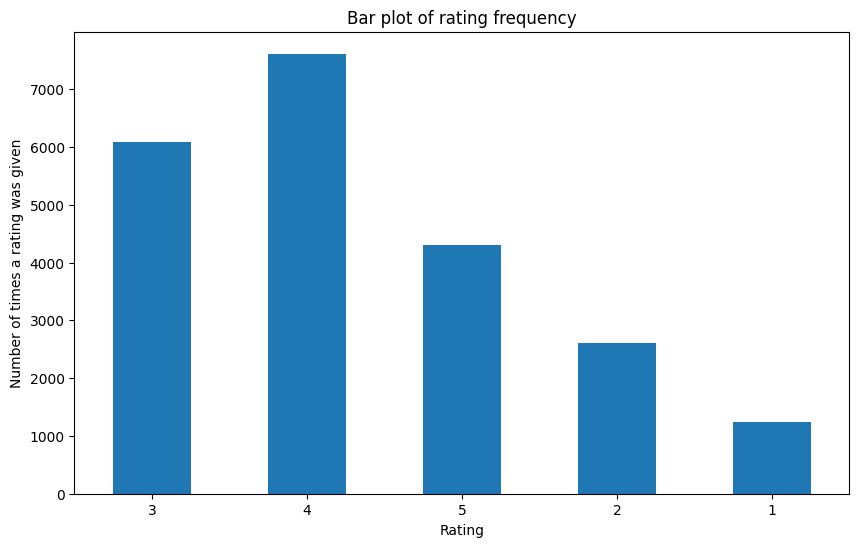

Total number of users watched this Genre:  21872
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Thriller . Recommendations based on top average ratings.
                                           rating
movie title                                      
Close Shave, A (1995)                    4.491071
Rear Window (1954)                       4.387560
Usual Suspects, The (1995)               4.385768
Third Man, The (1949)                    4.333333
Some Folks Call It a Sling Blade (1993)  4.292683
Silence of the Lambs, The (1991)         4.289744
North by Northwest (1959)                4.284916
Manchurian Candidate, The (1962)         4.259542
Vertigo (1958)                           4.251397
Innocents, The (1961)                    4.250000
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new user in Thriller genr

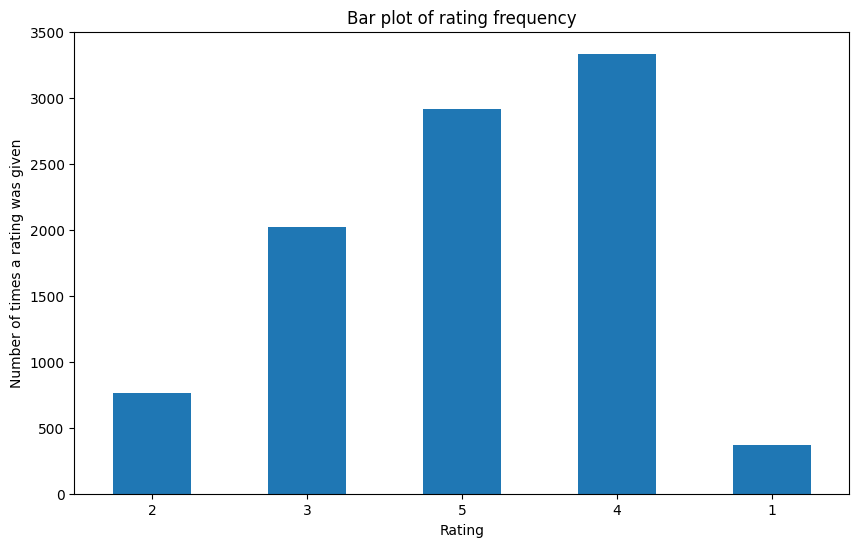

Total number of users watched this Genre:  9398
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: War . Recommendations based on top average ratings.
                                                      rating
movie title                                                 
Schindler's List (1993)                             4.466443
Casablanca (1942)                                   4.456790
Star Wars (1977)                                    4.358491
Dr. Strangelove or: How I Learned to Stop Worry...  4.252577
Lawrence of Arabia (1962)                           4.231214
Paths of Glory (1957)                               4.212121
Empire Strikes Back, The (1980)                     4.204360
Boot, Das (1981)                                    4.203980
African Queen, The (1951)                           4.184211
Bridge on the River Kwai, The (1957)                4.175758
****************************     *****************************

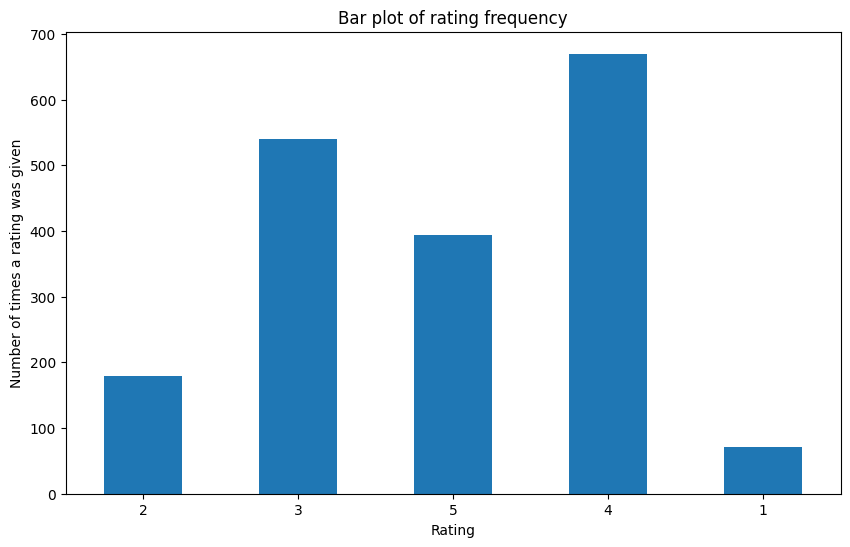

Total number of users watched this Genre:  1854
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Western . Recommendations based on top average ratings.
                                             rating
movie title                                        
High Noon (1952)                           4.102273
Wild Bunch, The (1969)                     4.023256
Butch Cassidy and the Sundance Kid (1969)  3.949074
Magnificent Seven, The (1954)              3.942149
Once Upon a Time in the West (1969)        3.868421
Unforgiven (1992)                          3.868132
Good, The Bad and The Ugly, The (1966)     3.861314
Dead Man (1995)                            3.823529
Dances with Wolves (1990)                  3.792969
Tombstone (1993)                           3.666667
****************************     ******************************     ******************************
These are the most popular movies which can be recommended to a new

In [36]:
for i in movie_genre_list[1:]:
  recommendations_genre(i)









<h1 align = "center" padding = "20px"> End of The Work <h1>


